In [2]:
import os

def parse(fname, proc):
    with open(fname, 'r', encoding = 'utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            nums = list(map(int, line.split(', ')))
            proc(nums)

t3_exists = set()
def proc3(ns):
    t3_exists.add(tuple(ns[:2]))
parse('C:/Users/esultano/Downloads/cpp_solutions.3.2097152.1.2097152.csv', proc3)

with open('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.triple_marked.csv', 'w', encoding = 'ascii') as f:
    cnt = 0
    def proc2(ns):
        global cnt
        flag = int(tuple(ns[:2]) in t3_exists)
        f.write(f'{ns[0]}, {ns[1]}, {flag}\n')
        if cnt % 500_000 == 0:
            print(round((os.path.getsize('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.triple_marked.csv') - cnt * 3) /
                os.path.getsize('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.csv') * 100, 1), '%, ', sep = '', end = '', flush = True)
        cnt += 1
    parse('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.csv', proc2)

0.0%, 4.9%, 10.0%, 15.5%, 21.1%, 26.6%, 32.2%, 37.7%, 43.3%, 48.9%, 54.5%, 60.2%, 65.9%, 71.8%, 77.9%, 84.0%, 90.2%, 96.3%, 

In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/esultano/Downloads/cpp_solutions.2.2097152.1.2097152.triple_marked.csv')
df.head()

,3,5,0
0,4,5,0
1,5,13,0
2,6,10,0
3,7,25,0
4,8,10,0


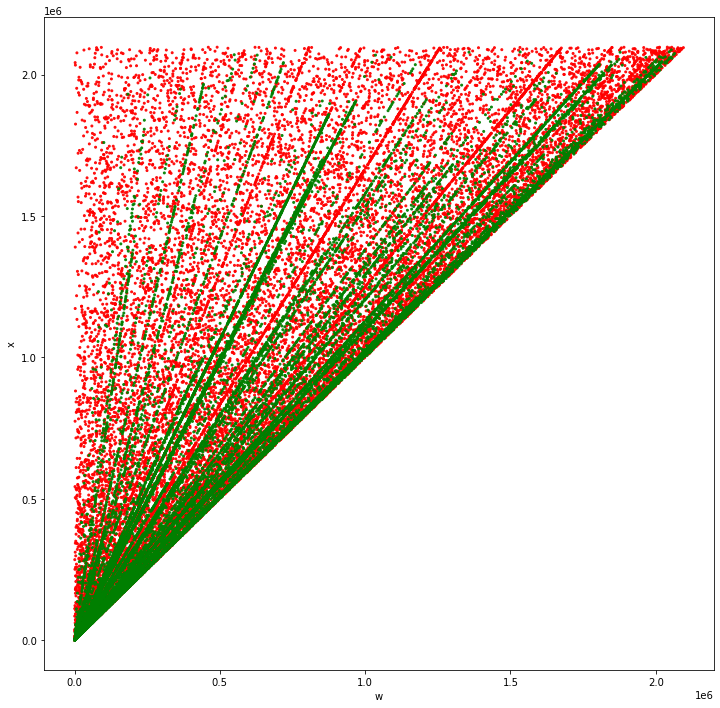

In [8]:
import matplotlib.pyplot as plt

df_plot = df.groupby(df.iloc[:,2]).sample(n=20000, random_state=1)
x = df_plot.iloc[:,0].to_numpy()
y = df_plot.iloc[:,1].to_numpy()
colors = df.iloc[:,2]
color_map = {0:'red', 1:'green'}

f = plt.figure(figsize=(12,12))
plt.scatter(x, y, s=4, alpha=0.9, c=df_plot.iloc[:,2].map(color_map))
plt.xlabel("w")
plt.ylabel("x")
plt.savefig('C:/Users/esultano/Downloads/pairs.png')  
plt.show()

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split

predict_col = 2

df_cluster = df.groupby(df.iloc[:,2]).sample(n=19999, random_state=1)
df_cluster[3]=0
df_cluster.iloc[:,3] = df_cluster.iloc[:,1]/df_cluster.iloc[:,0]
print(df_cluster.iloc[:,predict_col].value_counts())

df_train, df_test = train_test_split(df_cluster, test_size=0.3, stratify=df_cluster.iloc[:, predict_col])

col_train = np.r_[0:1,3]
y_train = df_train.iloc[:, predict_col]
y_test = df_test.iloc[:, predict_col]

# matrix of explanatory variables includes
X_train = df_train.iloc[:, col_train]
X_test = df_test.iloc[:, col_train]

print(df_cluster.iloc[:,3].value_counts())

0    19999
1    19999
Name:  0, dtype: int64
1.011905    2045
2.125000    1839
1.969697    1613
1.209150    1337
1.025000    1296
            ... 
5.436624       1
1.001166       1
1.610060       1
1.084685       1
1.266999       1
Name: 3, Length: 9404, dtype: int64


In [14]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
print(LR.score(X_test, y_test))

0.5


C:\Development\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Development\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [9]:
from sklearn import svm
from sklearn.svm import SVR

df_reduced = df_cluster.sample(100)
df_train_reduced, df_test_reduced = train_test_split(df_reduced, test_size=0.2, stratify=df_reduced.iloc[:, predict_col])
col_train = np.r_[0:1]
y_train_reduced = df_train_reduced.iloc[:,2]
y_test_reduced = df_test_reduced.iloc[:,2]

# matrix of explanatory variables includes
X_train_reduced = df_train_reduced.iloc[:, col_train]
X_test_reduced = df_test_reduced.iloc[:, col_train]

svc_lin = svm.LinearSVC()
svc_nu = svm.NuSVC(gamma='auto')
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1, cache_size=300)
svr_poly.fit(X_train_reduced, y_train_reduced)

score = svr_poly.score(X_test_reduced, y_test_reduced)
print(score)

In [15]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)
print(RF.score(X_test, y_test))

C:\Development\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8710833333333333


C:\Development\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [18]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier().fit(X_train, y_train)
print(DT.score(X_test, y_test))

0.906


C:\Development\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Development\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [20]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(hidden_layer_sizes=4, activation="relu", solver="adam", alpha=0.0001, learning_rate="adaptive", max_iter=100).fit(X_train, y_train)
print(MLP.score(X_test, y_test))

C:\Development\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.50475


C:\Development\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [21]:
from sklearn.ensemble import AdaBoostClassifier

ADBoost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10).fit(X_train, y_train)
print(ADBoost.score(X_test, y_test))

0.9065


C:\Development\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Development\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
